In [108]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("adultData2.csv")

In [22]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marrital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2

## Step 2.3

### Counting the Protected Class Subgroups

##### Age

In [52]:
old_age = (df['Age']>= 40).sum()
young_age = (df['Age'] < 40).sum()


print(("Above 40",old_age))
print(("Younger than 40",young_age))

('Above 40', 14237)
('Younger than 40', 18324)


##### Sex

In [48]:
male2 = df[df['Sex'].str.strip() == "Male"].shape
female2 = df[df['Sex'].str.strip() == "Female"].shape

print(("Male",male2[0]))
print(("Female",female2[0]))


('Male', 21790)
('Female', 10771)


In [46]:
white = df[df['Race'].str.strip() == "White"].shape
black = df[df['Race'].str.strip() == "Black"].shape
asian_pac = df[df['Race'].str.strip() == "Asian-Pac-Islander"].shape
american_indian  = df[df['Race'].str.strip() == "Amer-Indian-Eskimo"].shape
other = df[df['Race'].str.strip() == "Other"].shape


print(("White",white[0]))
print(("Black",black[0]))
print(("Asian-Pac",asian_pac[0]))
print(("American-Indian",american_indian[0]))
print(("Other",other[0]))

('White', 27816)
('Black', 3124)
('Asian-Pac', 1039)
('American-Indian', 311)
('Other', 271)


##### Marital Status

In [39]:
civilianMarriage = df[df['Marrital-Status'].str.strip() == "Married-civ-spouse"].shape
divorced = df[df['Marrital-Status'].str.strip() == "Divorced"].shape
never_married = df[df['Marrital-Status'].str.strip() == "Never-married"].shape
separated  = df[df['Marrital-Status'].str.strip() == "Separated"].shape
widowed = df[df['Marrital-Status'].str.strip() == "Widowed"].shape
spouseAbsent = df[df['Marrital-Status'].str.strip() == "Married-spouse-absent"].shape
armedForces = df[df['Marrital-Status'].str.strip() == "Married-AF-spouse"].shape


print(("Civilian Marriage",civilianMarriage[0]))
print(("Divorced",divorced[0]))
print(("Never Married",never_married[0]))
print(("Separated",separated[0]))
print(("Widowed",widowed[0]))
print(("Spouse Absent",spouseAbsent[0]))
print(("Armed Forces",armedForces[0]))






('Civilian Marriage', 14976)
('Divorced', 4443)
('Never Married', 10683)
('Separated', 1025)
('Widowed', 993)
('Spouse Absent', 418)
('Armed Forces', 23)


##### Native Country

In [44]:
# United States, Puerto Rico, Canada ,Outlying-US(Guam-USVI-etc), Cuba
# Honduras,Jamaica,Mexico,Dominican Republic,Haiti,Guatemala
# Nicaragua, El Salvador, Trinidad & Tobago


north_america  = df[df['Native-Country'].str.strip() == "United-States"].shape[0]  \
+ df[df['Native-Country'].str.strip() == "Puerto-Rico"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Canada"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Outlying-US(Guam-USVI-etc)"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Cuba"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Honduras"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Jamaica"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Mexico"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Dominican-Republic"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Haiti"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Guatemala"].shape[0]  \
+ df[df['Native-Country'].str.strip() == "Nicaragua"].shape[0] \
+ df[df['Native-Country'].str.strip() == "El-Salvador"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Trinadad&Tobago"].shape[0] \

###################

# Ecuador, Columbia, Peru
ecuador = df[df['Native-Country'].str.strip() == "Ecuador"].shape[0]
columbia = df[df['Native-Country'].str.strip() == "Columbia"].shape[0]
peru = df[df['Native-Country'].str.strip() == "Peru"].shape[0]
south_america = ecuador + columbia + peru


####################
# England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Hungary, Scotland
# Yugoslavia, Holand-Netherlands
england = df[df['Native-Country'].str.strip() == "England"].shape[0]
germany = df[df['Native-Country'].str.strip() == "Germany"].shape[0]
greece = df[df['Native-Country'].str.strip() == "Greece"].shape[0]
italy = df[df['Native-Country'].str.strip() == "Italy"].shape[0]
poland = df[df['Native-Country'].str.strip() == "Poland"].shape[0]
portugal = df[df['Native-Country'].str.strip() == "Portugal"].shape[0]
ireland = df[df['Native-Country'].str.strip() == "Ireland"].shape[0]
france = df[df['Native-Country'].str.strip() == "France"].shape[0]
hungary = df[df['Native-Country'].str.strip() == "Hungary"].shape[0]
scotland = df[df['Native-Country'].str.strip() == "Scotland"].shape[0]
yugoslavia = df[df['Native-Country'].str.strip() == "Yugoslavia"].shape[0]
netherlands = df[df['Native-Country'].str.strip() == "Holand-Netherlands"].shape[0]
europe = england + germany + italy + poland + portugal + ireland + france + hungary + scotland + yugoslavia + netherlands + greece


#########################
# Cambodia, India, Japan China, Iran, Philippines, Vietnam, Laos
# Taiwan, Thailand
cambodia = df[df['Native-Country'].str.strip() == "Cambodia"].shape[0]
india = df[df['Native-Country'].str.strip() == "India"].shape[0]
japan = df[df['Native-Country'].str.strip() == "Japan"].shape[0]
china = df[df['Native-Country'].str.strip() == "China"].shape[0]
iran = df[df['Native-Country'].str.strip() == "Iran"].shape[0]
philippines = df[df['Native-Country'].str.strip() == "Philippines"].shape[0]
vietnam = df[df['Native-Country'].str.strip() == "Vietnam"].shape[0]
laos = df[df['Native-Country'].str.strip() == "Laos"].shape[0]
taiwan = df[df['Native-Country'].str.strip() == "Taiwan"].shape[0]
thailand = df[df['Native-Country'].str.strip() == "Thailand"].shape[0]
asia = cambodia + india + japan + china + iran + philippines + vietnam + laos + taiwan + thailand

####################
unknown = df[df['Native-Country'].str.strip() == "?"].shape[0] \
+ df[df['Native-Country'].str.strip() == "Hong"].shape[0] \
+ df[df['Native-Country'].str.strip() == "South"].shape[0] \

###################
print(("North America",north_america))
print(("South America", south_america))
print(("Europe", europe))
print(("Asia", asia))
print(("Unknown",unknown))

('North America', 30588)
('South America', 118)
('Europe', 521)
('Asia', 651)
('Unknown', 683)


#### Relationship

In [53]:
wife = df[df['Relationship'].str.strip() == "Wife"].shape[0]
own_child = df[df['Relationship'].str.strip() == "Own-child"].shape[0]
husband = df[df['Relationship'].str.strip() == "Husband"].shape[0]
not_in_fam = df[df['Relationship'].str.strip() == "Not-in-family"].shape[0]
other_relative = df[df['Relationship'].str.strip() == "Other-relative"].shape[0]
unmarried = df[df['Relationship'].str.strip() == "Unmarried"].shape[0]

print(("Wife", wife))
print(("Own-child", own_child))
print(("Husband", husband))
print(("Not-in-family", not_in_fam))
print(("Other-relative", other_relative))
print(("Unmarried", unmarried))

('Wife', 1568)
('Own-child', 5068)
('Husband', 13193)
('Not-in-family', 8305)
('Other-relative', 981)
('Unmarried', 3446)


## Step 2.4 and 2.5

#### Education Level

In [54]:
# high_school_non_grad
#     9th, 10th, 11th, 12th
nineth = df[df['Education'].str.strip() == "9th"].shape[0]
tenth = df[df['Education'].str.strip() == "10th"].shape[0]
eleventh = df[df['Education'].str.strip() == "11th"].shape[0]
twelfth = df[df['Education'].str.strip() == "12th"].shape[0]
high_school_non_grad = nineth + tenth + eleventh + twelfth
print(("high_school_non_grad", high_school_non_grad))

# high_school_grad
#     HS-grad
high_school_grad = df[df['Education'].str.strip() == "HS-grad"].shape[0]
print(("high_school_grad", high_school_grad))

# pre_high_school
#     1st-4th, 5th-6th, 7th-8th, Preschool
one_four = df[df['Education'].str.strip() == "1st-4th"].shape[0]
five_six = df[df['Education'].str.strip() == "5th-6th"].shape[0]
seven_eight = df[df['Education'].str.strip() == "7th-8th"].shape[0]
preschool = df[df['Education'].str.strip() == "Preschool"].shape[0]
pre_high_school = one_four + five_six + seven_eight + preschool
print(("pre_high_school", pre_high_school))

# assoc_deg
#     Assoc-acdm
#     Assoc-voc
assoc_acdm = df[df['Education'].str.strip() == "Assoc-acdm"].shape[0]
assoc_voc = df[df['Education'].str.strip() == "Assoc-voc"].shape[0]
assoc_deg = assoc_acdm + assoc_voc
print(("assoc_deg", assoc_deg))

# post_bach
#     Doctorate
#     Masters
#     Prof-school
doctorate = df[df['Education'].str.strip() == "Doctorate"].shape[0]
masters = df[df['Education'].str.strip() == "Masters"].shape[0]
prof_school = df[df['Education'].str.strip() == "Prof-school"].shape[0]
post_bach = doctorate + masters + prof_school
print(("post_bach", post_bach))

# bachelors
#     Bachelors
bachelors = df[df['Education'].str.strip() == "Bachelors"].shape[0]
print(("bachelors", bachelors))

# some_college
#     Some-college
some_college = df[df['Education'].str.strip() == "Some-college"].shape[0]
print(("some_college", some_college))

('high_school_non_grad', 3055)
('high_school_grad', 10501)
('pre_high_school', 1198)
('assoc_deg', 2449)
('post_bach', 2712)
('bachelors', 5355)
('some_college', 7291)


#### Protected Variable : Age
#### Dependent: Education Level

In [76]:
# OLD AGE
##################################################################################
old_age_9th = ((df['Age']>= 40) & (df['Education'].str.strip() == "9th")).sum()
old_age_10th = ((df['Age']>= 40) & (df['Education'].str.strip() == "10th")).sum()
old_age_11th = ((df['Age']>= 40) & (df['Education'].str.strip() == "11th")).sum()
old_age_12th = ((df['Age']>= 40) & (df['Education'].str.strip() == "12th")).sum()

old_age_HS_no_grad = old_age_9th + old_age_10th + old_age_11th + old_age_12th

############################

old_age_HS_grad = ((df['Age']>= 40) &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

old_age_one_four = ((df['Age']>= 40) & (df['Education'].str.strip() == "1st-4th")).sum()
old_age_five_six = ((df['Age']>= 40) & (df['Education'].str.strip() == "5th-6th")).sum()
old_age_seven_eight = ((df['Age']>= 40) & (df['Education'].str.strip() == "7th-8th")).sum()
old_age_preschool = ((df['Age']>= 40) & (df['Education'].str.strip() == "Preschool")).sum()

old_age_HS_pre_HS = old_age_one_four + old_age_five_six + old_age_seven_eight + old_age_preschool

##############

old_age_assoc_acdm = ((df['Age']>= 40) & (df['Education'].str.strip() == "Assoc-acdm")).sum()
old_age_assoc_voc = ((df['Age']>= 40) & (df['Education'].str.strip() == "Assoc-voc")).sum()

old_age_assoc = old_age_assoc_acdm + old_age_assoc_voc

####################
old_age_doctorate = ((df['Age']>= 40) & (df['Education'].str.strip() == "Doctorate")).sum()
old_age_masters = ((df['Age']>= 40) & (df['Education'].str.strip() == "Masters")).sum()
old_age_prof_school =((df['Age']>= 40) & (df['Education'].str.strip() == "Prof-school")).sum()

old_age_post_bach = old_age_doctorate + old_age_masters +  old_age_prof_school


#############
old_age_bach = ((df['Age']>= 40) & (df['Education'].str.strip() == "Bachelors")).sum()

#############
old_age_some_college = ((df['Age']>= 40) & (df['Education'].str.strip() == "Some-college")).sum()


print(("Old and High School Non Graduate",old_age_HS_no_grad))
print(("Old and HS Graduate",old_age_HS_grad))
print(("Old and Pre-High School",old_age_HS_pre_HS))
print(("Old and Associates",old_age_assoc))
print(("Old and Post-Bach",old_age_post_bach))
print(("Old and Bach",old_age_bach))
print(("Old and Some College",old_age_some_college))


# YOUNG AGE
#################################################################################
young_age_9th = ((df['Age'] < 40) & (df['Education'].str.strip() == "9th")).sum()
young_age_10th = ((df['Age'] < 40) & (df['Education'].str.strip() == "10th")).sum()
young_age_11th = ((df['Age'] < 40) & (df['Education'].str.strip() == "11th")).sum()
young_age_12th = ((df['Age'] < 40) & (df['Education'].str.strip() == "12th")).sum()

young_age_HS_no_grad = young_age_9th + young_age_10th + young_age_11th + young_age_12th

############################

young_age_HS_grad = ((df['Age'] < 40) &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

young_age_one_four = ((df['Age'] < 40) & (df['Education'].str.strip() == "1st-4th")).sum()
young_age_five_six = ((df['Age'] < 40) & (df['Education'].str.strip() == "5th-6th")).sum()
young_age_seven_eight = ((df['Age'] < 40) & (df['Education'].str.strip() == "7th-8th")).sum()
young_age_preschool = ((df['Age'] < 40) & (df['Education'].str.strip() == "Preschool")).sum()

young_age_HS_pre_HS = young_age_one_four + young_age_five_six + young_age_seven_eight + young_age_preschool

##############

young_age_assoc_acdm = ((df['Age'] < 40) & (df['Education'].str.strip() == "Assoc-acdm")).sum()
young_age_assoc_voc = ((df['Age'] < 40) & (df['Education'].str.strip() == "Assoc-voc")).sum()

young_age_assoc = young_age_assoc_acdm + young_age_assoc_voc

####################
young_age_doctorate = ((df['Age'] < 40) & (df['Education'].str.strip() == "Doctorate")).sum()
young_age_masters = ((df['Age'] < 40) & (df['Education'].str.strip() == "Masters")).sum()
young_age_prof_school =((df['Age'] < 40) & (df['Education'].str.strip() == "Prof-school")).sum()

young_age_post_bach = young_age_doctorate + young_age_masters +  young_age_prof_school


#############
young_age_bach = ((df['Age'] < 40) & (df['Education'].str.strip() == "Bachelors")).sum()

#############
young_age_some_college = ((df['Age'] < 40) & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("Young and High School Non Graduate",young_age_HS_no_grad))
print(("Young and HS Graduate",young_age_HS_grad))
print(("Young and Pre-High School",young_age_HS_pre_HS))
print(("Young and Associates",young_age_assoc))
print(("Young and Post-Bach",young_age_post_bach))
print(("Young and Bach",young_age_bach))
print(("Young and Some College",young_age_some_college))

('Old and High School Non Graduate', 1091)
('Old and HS Graduate', 4584)
('Old and Pre-High School', 764)
('Old and Associates', 1001)
('Old and Post-Bach', 1791)
('Old and Bach', 2316)
('Old and Some College', 2690)

('Young and High School Non Graduate', 1964)
('Young and HS Graduate', 5917)
('Young and Pre-High School', 434)
('Young and Associates', 1448)
('Young and Post-Bach', 921)
('Young and Bach', 3039)
('Young and Some College', 4601)


#### Protected Variable : Sex
#### Dependent: Education Level

In [80]:
# MALE
##################################################################################
male_9th = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "9th")).sum()
male_10th = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "10th")).sum()
male_11th = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "11th")).sum()
male_12th = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "12th")).sum()


male_HS_no_grad = male_9th + male_10th + male_11th + male_12th

############################

male_HS_grad = ((df['Sex'].str.strip() == "Male") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

male_one_four = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "1st-4th")).sum()
male_five_six = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "5th-6th")).sum()
male_seven_eight = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "7th-8th")).sum()
male_preschool = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Preschool")).sum()

male_HS_pre_HS = male_one_four + male_five_six + male_seven_eight + male_preschool

##############

male_assoc_acdm = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
male_assoc_voc = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Assoc-voc")).sum()

male_assoc = male_assoc_acdm + male_assoc_voc

####################
male_doctorate = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Doctorate")).sum()
male_masters = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Masters")).sum()
male_prof_school =((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Prof-school")).sum()

male_post_bach = male_doctorate + male_masters +  male_prof_school


#############
male_bach = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
male_some_college = ((df['Sex'].str.strip() == "Male") & (df['Education'].str.strip() == "Some-college")).sum()


print(("Male and High School Non Graduate",male_HS_no_grad))
print(("Male and HS Graduate",male_HS_grad))
print(("Male and Pre-High School",male_HS_pre_HS))
print(("Male and Associates",male_assoc))
print(("Male and Post-Bach",male_post_bach))
print(("Male and Bach",male_bach))
print(("Male and Some College",male_some_college))


# FEMALE
#################################################################################
female_9th = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "9th")).sum()
female_10th = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "10th")).sum()
female_11th = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "11th")).sum()
female_12th = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "12th")).sum()

female_HS_no_grad = female_9th + female_10th + female_11th + female_12th

############################

female_HS_grad = ((df['Sex'].str.strip() == "Female") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

female_one_four = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "1st-4th")).sum()
female_five_six = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "5th-6th")).sum()
female_seven_eight = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "7th-8th")).sum()
female_preschool = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Preschool")).sum()

female_HS_pre_HS = female_one_four + female_five_six + female_seven_eight + female_preschool

##############

female_assoc_acdm = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
female_assoc_voc = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Assoc-voc")).sum()

female_assoc = female_assoc_acdm + female_assoc_voc

####################
female_doctorate = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Doctorate")).sum()
female_masters = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Masters")).sum()
female_prof_school =((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Prof-school")).sum()

female_post_bach = female_doctorate + female_masters +  female_prof_school


#############
female_bach = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
female_some_college = ((df['Sex'].str.strip() == "Female") & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("Female and High School Non Graduate",female_HS_no_grad))
print(("Female and HS Graduate",female_HS_grad))
print(("Female and Pre-High School",female_HS_pre_HS))
print(("Female and Associates",female_assoc))
print(("Female and Post-Bach",female_post_bach))
print(("Female and Bach",female_bach))
print(("Female and Some College",female_some_college))

('Male and High School Non Graduate', 2040)
('Male and HS Graduate', 7111)
('Male and Pre-High School', 892)
('Male and Associates', 1528)
('Male and Post-Bach', 1998)
('Male and Bach', 3736)
('Male and Some College', 4485)

('Female and High School Non Graduate', 1015)
('Female and HS Graduate', 3390)
('Female and Pre-High School', 306)
('Female and Associates', 921)
('Female and Post-Bach', 714)
('Female and Bach', 1619)
('Female and Some College', 2806)


#### Protected Variable : Age
#### Dependent: Race

In [84]:
# WHITE 
##################################################################################
white_9th = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "9th")).sum()
white_10th = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "10th")).sum()
white_11th = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "11th")).sum()
white_12th = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "12th")).sum()


white_HS_no_grad = white_9th + white_10th + white_11th + white_12th

############################

white_HS_grad = ((df['Race'].str.strip() == "White") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

white_one_four = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "1st-4th")).sum()
white_five_six = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "5th-6th")).sum()
white_seven_eight = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "7th-8th")).sum()
white_preschool = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Preschool")).sum()

white_HS_pre_HS = white_one_four + white_five_six + white_seven_eight + white_preschool

##############

white_assoc_acdm = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
white_assoc_voc = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Assoc-voc")).sum()

white_assoc = white_assoc_acdm + white_assoc_voc

####################
white_doctorate = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Doctorate")).sum()
white_masters = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Masters")).sum()
white_prof_school =((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Prof-school")).sum()

white_post_bach = white_doctorate + white_masters +  white_prof_school


#############
white_bach = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
white_some_college = ((df['Race'].str.strip() == "White") & (df['Education'].str.strip() == "Some-college")).sum()


print(("white and Pre-High School",white_HS_pre_HS))
print(("white and High School Non Graduate",white_HS_no_grad))
print(("white and HS Graduate",white_HS_grad))
print(("white and Some College",white_some_college))
print(("white and Associates",white_assoc))
print(("white and Bach",white_bach))
print(("white and Post-Bach",white_post_bach))

# BLACK 
##################################################################################
black_9th = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "9th")).sum()
black_10th = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "10th")).sum()
black_11th = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "11th")).sum()
black_12th = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "12th")).sum()


black_HS_no_grad = black_9th + black_10th + black_11th + black_12th

############################

black_HS_grad = ((df['Race'].str.strip() == "Black") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

black_one_four = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "1st-4th")).sum()
black_five_six = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "5th-6th")).sum()
black_seven_eight = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "7th-8th")).sum()
black_preschool = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Preschool")).sum()

black_HS_pre_HS = black_one_four + black_five_six + black_seven_eight + black_preschool

##############

black_assoc_acdm = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
black_assoc_voc = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Assoc-voc")).sum()

black_assoc = black_assoc_acdm + black_assoc_voc

####################
black_doctorate = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Doctorate")).sum()
black_masters = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Masters")).sum()
black_prof_school =((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Prof-school")).sum()

black_post_bach = black_doctorate + black_masters +  black_prof_school


#############
black_bach = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
black_some_college = ((df['Race'].str.strip() == "Black") & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("black and Pre-High School",black_HS_pre_HS))
print(("black and High School Non Graduate",black_HS_no_grad))
print(("black and HS Graduate",black_HS_grad))
print(("black and Some College",black_some_college))
print(("black and Associates",black_assoc))
print(("black and Bach",black_bach))
print(("black and Post-Bach",black_post_bach))


# ASIAN-PAC_ISLANDER
##################################################################################
asian_9th = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "9th")).sum()
asian_10th = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "10th")).sum()
asian_11th = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "11th")).sum()
asian_12th = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "12th")).sum()


asian_HS_no_grad = asian_9th + asian_10th + asian_11th + asian_12th

############################

asian_HS_grad = ((df['Race'].str.strip() == "Asian-Pac-Islander") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

asian_one_four = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "1st-4th")).sum()
asian_five_six = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "5th-6th")).sum()
asian_seven_eight = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "7th-8th")).sum()
asian_preschool = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Preschool")).sum()

asian_HS_pre_HS = asian_one_four + asian_five_six + asian_seven_eight + asian_preschool

##############

asian_assoc_acdm = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
asian_assoc_voc = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Assoc-voc")).sum()

asian_assoc = asian_assoc_acdm + asian_assoc_voc

####################
asian_doctorate = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Doctorate")).sum()
asian_masters = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Masters")).sum()
asian_prof_school =((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Prof-school")).sum()

asian_post_bach = asian_doctorate + asian_masters +  asian_prof_school


#############
asian_bach = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
asian_some_college = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("asian and Pre-High School",asian_HS_pre_HS))
print(("asian and High School Non Graduate",asian_HS_no_grad))
print(("asian and HS Graduate",asian_HS_grad))
print(("asian and Some College",asian_some_college))
print(("asian and Associates",asian_assoc))
print(("asian and Bach",asian_bach))
print(("asian and Post-Bach",asian_post_bach))


# AMERICAN INDIAN & ESKIMO
##################################################################################
americanIndian_9th = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "9th")).sum()
americanIndian_10th = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "10th")).sum()
americanIndian_11th = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "11th")).sum()
americanIndian_12th = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "12th")).sum()


americanIndian_HS_no_grad = americanIndian_9th + americanIndian_10th + americanIndian_11th + americanIndian_12th

############################

americanIndian_HS_grad = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

americanIndian_one_four = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "1st-4th")).sum()
americanIndian_five_six = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "5th-6th")).sum()
americanIndian_seven_eight = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "7th-8th")).sum()
americanIndian_preschool = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Preschool")).sum()

americanIndian_HS_pre_HS = americanIndian_one_four + americanIndian_five_six + americanIndian_seven_eight + americanIndian_preschool

##############

americanIndian_assoc_acdm = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
americanIndian_assoc_voc = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Assoc-voc")).sum()

americanIndian_assoc = americanIndian_assoc_acdm + americanIndian_assoc_voc

####################
americanIndian_doctorate = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Doctorate")).sum()
americanIndian_masters = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Masters")).sum()
americanIndian_prof_school =((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Prof-school")).sum()

americanIndian_post_bach = americanIndian_doctorate + americanIndian_masters +  americanIndian_prof_school


#############
americanIndian_bach = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
americanIndian_some_college = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("americanIndian and Pre-High School",americanIndian_HS_pre_HS))
print(("americanIndian and High School Non Graduate",americanIndian_HS_no_grad))
print(("americanIndian and HS Graduate",americanIndian_HS_grad))
print(("americanIndian and Some College",americanIndian_some_college))
print(("americanIndian and Associates",americanIndian_assoc))
print(("americanIndian and Bach",americanIndian_bach))
print(("americanIndian and Post-Bach",americanIndian_post_bach))

# OTHER
##################################################################################
other_9th = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "9th")).sum()
other_10th = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "10th")).sum()
other_11th = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "11th")).sum()
other_12th = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "12th")).sum()


other_HS_no_grad = other_9th + other_10th + other_11th + other_12th

############################

other_HS_grad = ((df['Race'].str.strip() == "Other") &  (df['Education'].str.strip() == "HS-grad")).sum()

############################

other_one_four = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "1st-4th")).sum()
other_five_six = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "5th-6th")).sum()
other_seven_eight = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "7th-8th")).sum()
other_preschool = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Preschool")).sum()

other_HS_pre_HS = other_one_four + other_five_six + other_seven_eight + other_preschool

##############

other_assoc_acdm = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Assoc-acdm")).sum()
other_assoc_voc = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Assoc-voc")).sum()

other_assoc = other_assoc_acdm + other_assoc_voc

####################
other_doctorate = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Doctorate")).sum()
other_masters = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Masters")).sum()
other_prof_school =((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Prof-school")).sum()

other_post_bach = other_doctorate + other_masters +  other_prof_school


#############
other_bach = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Bachelors")).sum()

#############
other_some_college = ((df['Race'].str.strip() == "Other") & (df['Education'].str.strip() == "Some-college")).sum()

print()
print(("other and Pre-High School",other_HS_pre_HS))
print(("other and High School Non Graduate",other_HS_no_grad))
print(("other and HS Graduate",other_HS_grad))
print(("other and Some College",other_some_college))
print(("other and Associates",other_assoc))
print(("other and Bach",other_bach))
print(("other and Post-Bach",other_post_bach))

('white and Pre-High School', 1004)
('white and High School Non Graduate', 2477)
('white and HS Graduate', 8904)
('white and Some College', 6207)
('white and Associates', 2122)
('white and Bach', 4682)
('white and Post-Bach', 2420)

('black and Pre-High School', 98)
('black and High School Non Graduate', 445)
('black and HS Graduate', 1174)
('black and Some College', 746)
('black and Associates', 219)
('black and Bach', 330)
('black and Post-Bach', 112)

('asian and Pre-High School', 40)
('asian and High School Non Graduate', 52)
('asian and HS Graduate', 226)
('asian and Some College', 208)
('asian and Associates', 67)
('asian and Bach', 289)
('asian and Post-Bach', 157)

('americanIndian and Pre-High School', 15)
('americanIndian and High School Non Graduate', 40)
('americanIndian and HS Graduate', 119)
('americanIndian and Some College', 79)
('americanIndian and Associates', 27)
('americanIndian and Bach', 21)
('americanIndian and Post-Bach', 10)

('other and Pre-High School', 41)
(

#### Income

In [77]:
# ≤ 50K
low_income = df[df['Income'].str.strip() == "<=50K"].shape[0]
print(("low_income", low_income))

# > 50K
high_income = df[df['Income'].str.strip() == ">50K"].shape[0]
print(("high_income", high_income))

('low_income', 24720)
('high_income', 7841)


In [79]:
# OLD AGE
##################################################################################
old_age_low_income = ((df['Age']>= 40) & (df['Income'].str.strip() == "<=50K")).sum()
old_age_high_income = ((df['Age']>= 40) & (df['Income'].str.strip() == ">50K")).sum()


print(("old_age_low_income", old_age_low_income))
print(("old_age_high_income", old_age_high_income))


# YOUNG AGE
##################################################################################

young_age_low_income = ((df['Age']< 40) & (df['Income'].str.strip() == "<=50K")).sum()
young_age_high_income = ((df['Age']< 40) & (df['Income'].str.strip() == ">50K")).sum()

print(("young_age_low_income", young_age_low_income))
print(("young_age_high_income", young_age_high_income))

('old_age_low_income', 9216)
('old_age_high_income', 5021)
('young_age_low_income', 15504)
('young_age_high_income', 2820)


#### Protected Variable : Sex
#### Dependent: Income

In [81]:
# MALE 
##################################################################################
male_low_income = ((df['Sex'].str.strip() == "Male") & (df['Income'].str.strip() == "<=50K")).sum()
male_high_income = ((df['Sex'].str.strip() == "Male") & (df['Income'].str.strip() == ">50K")).sum()


print(("male_low_income", male_low_income))
print(("male_high_income", male_high_income))


# FEMALE
##################################################################################

female_low_income = ((df['Sex'].str.strip() == "Female") & (df['Income'].str.strip() == "<=50K")).sum()
female_high_income = ((df['Sex'].str.strip() == "Female") & (df['Income'].str.strip() == ">50K")).sum()

print(("female_low_income", female_low_income))
print(("female_high_income", female_high_income))

('male_low_income', 15128)
('male_high_income', 6662)
('female_low_income', 9592)
('female_high_income', 1179)


#### Protected Variable : Race
#### Dependent: Income

In [85]:
# WHITE  
##################################################################################
white_low_income = ((df['Race'].str.strip() == "White") & (df['Income'].str.strip() == "<=50K")).sum()
white_high_income = ((df['Race'].str.strip() == "White") & (df['Income'].str.strip() == ">50K")).sum()


print(("white_low_income", white_low_income))
print(("white_high_income", white_high_income))


# BLACK 
##################################################################################
black_low_income = ((df['Race'].str.strip() == "Black") & (df['Income'].str.strip() == "<=50K")).sum()
black_high_income = ((df['Race'].str.strip() == "Black") & (df['Income'].str.strip() == ">50K")).sum()

print()
print(("black_low_income", black_low_income))
print(("black_high_income", black_high_income))


# ASIAN PACIFIC ISLANDER  
##################################################################################
asian_low_income = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Income'].str.strip() == "<=50K")).sum()
asian_high_income = ((df['Race'].str.strip() == "Asian-Pac-Islander") & (df['Income'].str.strip() == ">50K")).sum()

print()
print(("asian_low_income", asian_low_income))
print(("asian_high_income", asian_high_income))



# AMERICAN INDIAN ESKIMO 
##################################################################################
american_indian_low_income = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Income'].str.strip() == "<=50K")).sum()
american_indian_high_income = ((df['Race'].str.strip() == "Amer-Indian-Eskimo") & (df['Income'].str.strip() == ">50K")).sum()

print()
print(("american_indian_low_income", american_indian_low_income))
print(("american_indian_high_income", american_indian_high_income))


# OTHER 
##################################################################################
other_low_income = ((df['Race'].str.strip() == "Other") & (df['Income'].str.strip() == "<=50K")).sum()
other_high_income = ((df['Race'].str.strip() == "Other") & (df['Income'].str.strip() == ">50K")).sum()

print()
print(("other_low_income", other_low_income))
print(("other_high_income", other_high_income))

('white_low_income', 20699)
('white_high_income', 7117)

('black_low_income', 2737)
('black_high_income', 387)

('asian_low_income', 763)
('asian_high_income', 276)

('american_indian_low_income', 275)
('american_indian_high_income', 36)

('other_low_income', 246)
('other_high_income', 25)


In [94]:
def countryCount(name,array):

    total_HS_no_grad = 0
    total_HS_grad = 0
    total_HS_pre_HS = 0
    total_assoc = 0
    total_post_bach = 0
    total_bach = 0
    total_some_college = 0

    total_high_income = 0
    total_low_income = 0

    for i in range(len(array)):
        grade9th = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "9th")).sum()
        grade10th = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "10th")).sum()
        grade11th = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "11th")).sum()
        grade12th = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "12th")).sum()
   
        grade_HS_no_grad = grade9th + grade10th + grade11th + grade12th

        total_HS_no_grad += grade_HS_no_grad

        country_low_income = ((df['Native-Country'].str.strip() == array[i]) & (df['Income'].str.strip() == "<=50K")).sum()
        country_high_income = ((df['Native-Country'].str.strip() == array[i]) & (df['Income'].str.strip() == ">50K")).sum()

        total_low_income += country_low_income
        total_high_income += country_high_income


        ###################

        grade_HS_grad = ((df['Native-Country'].str.strip() == array[i]) &  (df['Education'].str.strip() == "HS-grad")).sum()

        total_HS_grad += grade_HS_grad

        ###################

        grade_one_four = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "1st-4th")).sum()
        grade_five_six = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "5th-6th")).sum()
        grade_seven_eight = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "7th-8th")).sum()
        grade_preschool = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Preschool")).sum()

        grade_HS_pre_HS = grade_one_four + grade_five_six + grade_seven_eight + grade_preschool

        total_HS_pre_HS += grade_HS_pre_HS

        ###################

        grade_assoc_acdm = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Assoc-acdm")).sum()
        grade_assoc_voc = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Assoc-voc")).sum()

        grade_assoc = grade_assoc_acdm + grade_assoc_voc

        total_assoc += grade_assoc

        #################

        grade_doctorate = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Doctorate")).sum()
        grade_masters = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Masters")).sum()
        grade_prof_school =((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Prof-school")).sum()

        grade_post_bach = grade_doctorate + grade_masters +  grade_prof_school

        total_post_bach += grade_post_bach

        #################

        grade_bach = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Bachelors")).sum()

        total_bach += grade_bach

        #################

        grade_some_college = ((df['Native-Country'].str.strip() == array[i]) & (df['Education'].str.strip() == "Some-college")).sum()

        total_some_college += grade_some_college


    print(name)
    print(("total and Pre-High School",total_HS_pre_HS))
    print(("total and High School Non Graduate",total_HS_no_grad))
    print(("total and HS Graduate",total_HS_grad))
    print(("total and Some College",total_some_college))
    print(("total and Associates",total_assoc))
    print(("total and Bach",total_bach))
    print(("total and Post-Bach",total_post_bach))
    print()
    print(("total_low_income", total_low_income))
    print(("total_high_income", total_high_income))
    print()
    print()
    print()

In [100]:
north_amer = ["United-States","Puerto-Rico","Canada","Outlying-US(Guam-USVI-etc)","Cuba","Honduras","Jamaica","Mexico","Dominican-Republic","Haiti","Guatemala","Nicaragua","El-Salvador","Trinadad&Tobago"]
countryCount("north_america",north_amer)
countryCount("south_america",["Ecuador", "Columbia", "Peru"])
countryCount("europe",["England", "Germany", "Greece", "Italy", "Poland", "Portugal", "Ireland", "France", "Hungary", "Scotland", "Yugoslavia", "Holand-Netherlands"])
countryCount("asia",["Cambodia", "India", "Japan", "China", "Iran", "Philippines", "Vietnam", "Laos", "Taiwan", "Thailand"])
countryCount("unknown",["?", "South", "Hong"])

north_america
('total and Pre-High School', 1075)
('total and High School Non Graduate', 2917)
('total and HS Graduate', 10040)
('total and Some College', 6950)
('total and Associates', 2321)
('total and Bach', 4877)
('total and Post-Bach', 2408)

('total_low_income', 23275)
('total_high_income', 7313)



south_america
('total and Pre-High School', 7)
('total and High School Non Graduate', 17)
('total and HS Graduate', 43)
('total and Some College', 22)
('total and Associates', 12)
('total and Bach', 10)
('total and Post-Bach', 7)

('total_low_income', 110)
('total_high_income', 8)



europe
('total and Pre-High School', 43)
('total and High School Non Graduate', 36)
('total and HS Graduate', 144)
('total and Some College', 85)
('total and Associates', 51)
('total and Bach', 105)
('total and Post-Bach', 57)

('total_low_income', 369)
('total_high_income', 152)



asia
('total and Pre-High School', 30)
('total and High School Non Graduate', 36)
('total and HS Graduate', 114)
('total and

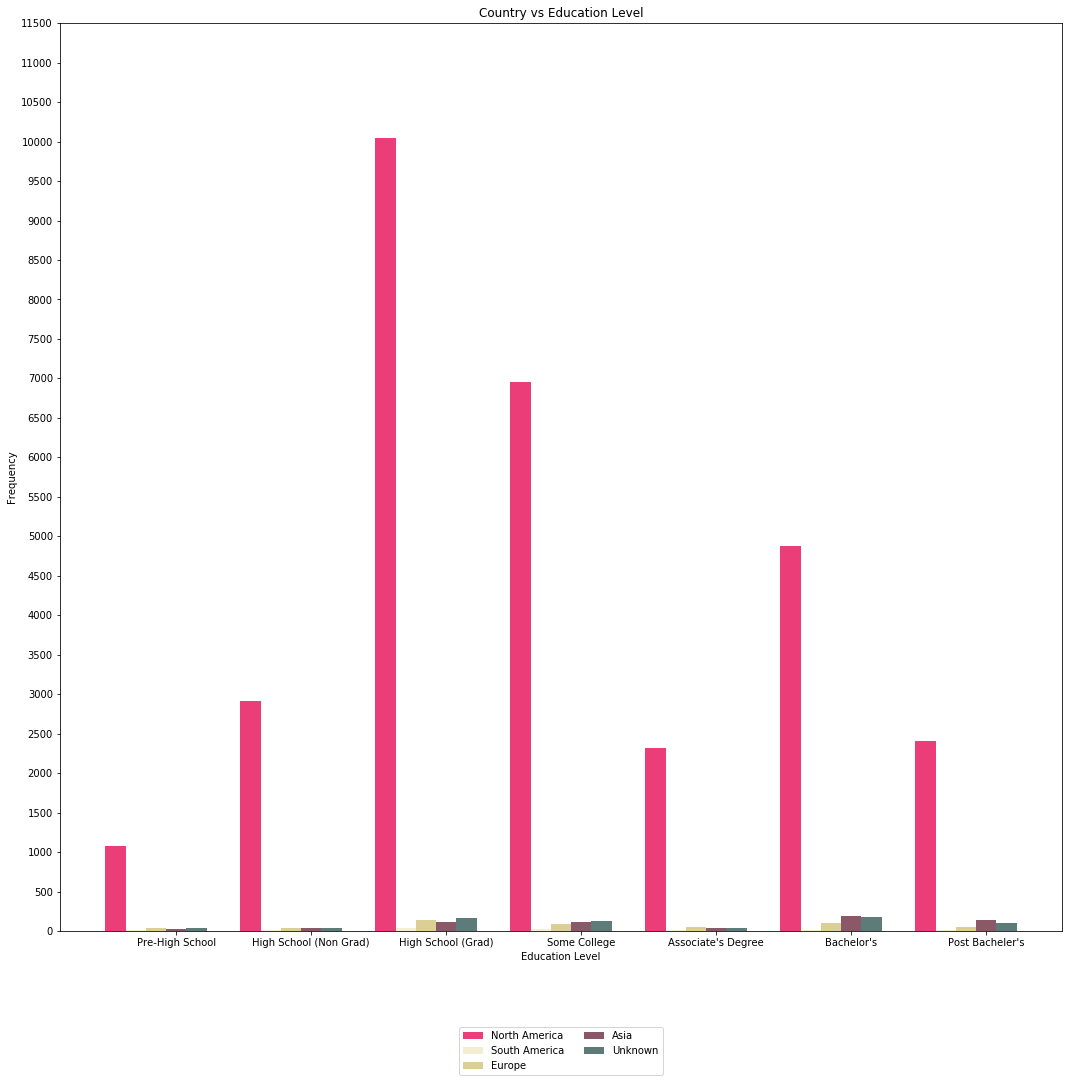

In [160]:
# COUNTRY VS EDUCATION 

n_groups = 7

# ORDER IS THE SAME AS THE DOC
north_america = (1075,2917,10040,6950,2321,4877,2408)
south_america = (7,17,43,22,12,10,7)
europe = (43,36,144,85,51,105,57)
asia = (30,36,114,111,32,191,137)
unknown = (43,39,160,123,33,172,103)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, north_america , bar_width,
alpha=opacity,
color= '#E70E58',
label='North America')

rects2 = plt.bar(index + bar_width, south_america , bar_width,
alpha=opacity,
color= '#F0EBC5',
label='South America')
 
rects3 = plt.bar(index + bar_width + bar_width, europe, bar_width,
alpha=opacity,
color='#D3C37C',
label='Europe')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, asia, bar_width,
alpha=opacity,
color='#6D2E41',
label='Asia')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, unknown, bar_width,
alpha=opacity,
color='#355A57',
label='Unknown')

 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Country vs Education Level')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)',
                         'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))
plt.yticks(np.arange(0, 12000, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()

#CHANGE THE NAME PER GRAPH
fig.savefig('countryEducation.png')

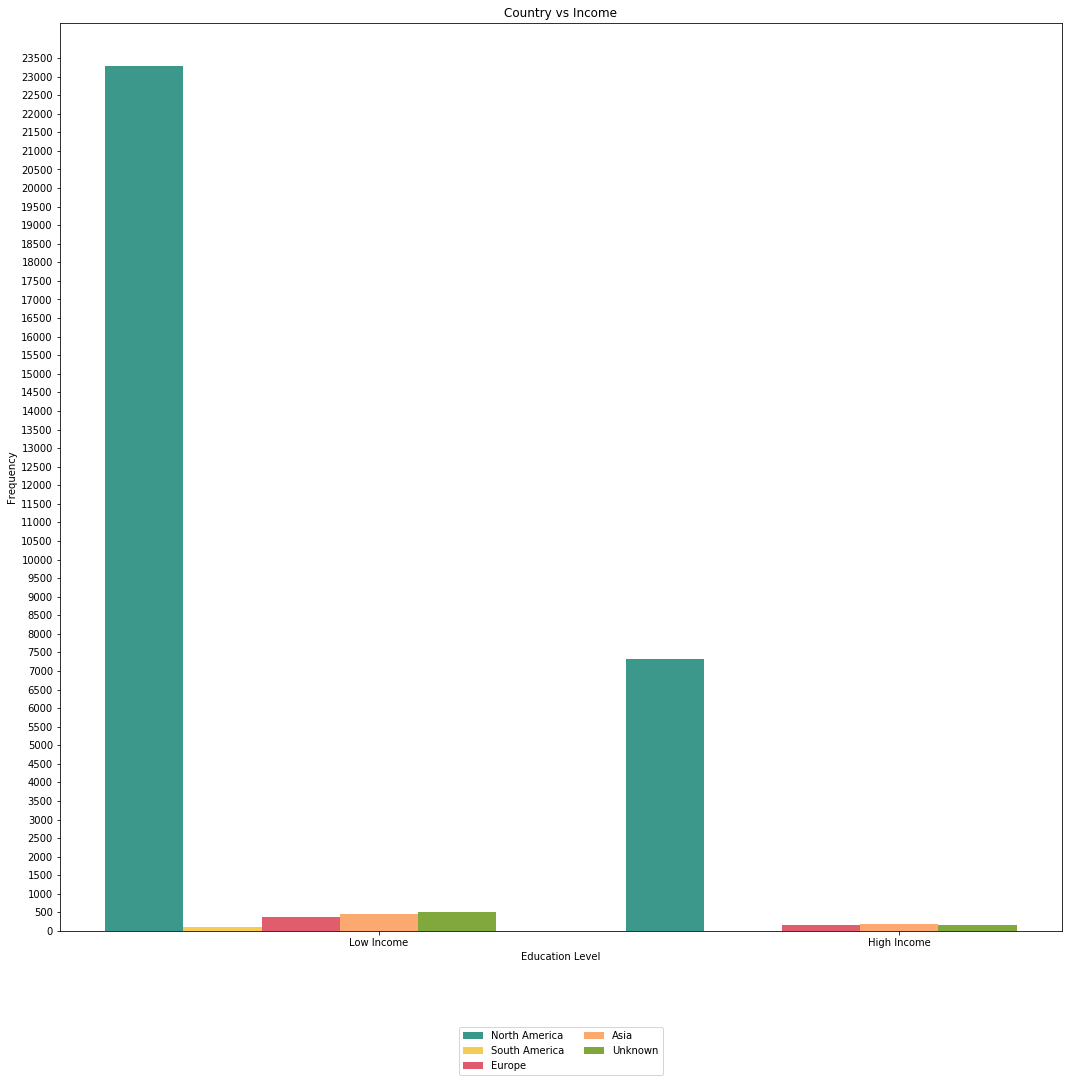

In [159]:
# INCOME VS EDUCATION 

n_groups = 2

# ORDER - LOW INCOME, HIGH INCOME
north_america = (23275,7313)
south_america = (110,8)
europe = (369,152)
asia = (451,200)
unknown = (515,168)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, north_america , bar_width,
alpha=opacity,
color= '#0C7E6F',
label='North America')

rects2 = plt.bar(index + bar_width, south_america , bar_width,
alpha=opacity,
color= '#F4C029',
label='South America')
 
rects3 = plt.bar(index + bar_width + bar_width, europe, bar_width,
alpha=opacity,
color='#D9344A',
label='Europe')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, asia, bar_width,
alpha=opacity,
color='#FB944C',
label='Asia')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, unknown, bar_width,
alpha=opacity,
color='#61920C',
label='Unknown')

 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Country vs Income')
# plt.xticks(index + 1, ('Pre-High School', 'High School (Non Grad)', 'High School (Grad)'
#                          'Some College', 'Associate\'s Degree', 'Bachelor\'s', 'Post Bacheler\'s'))

plt.xticks(index + bar_width + bar_width + bar_width, ('Low Income', 'High Income'))
plt.yticks(np.arange(0, 24000, 500))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [15,15]

plt.tight_layout()
plt.show()


fig.savefig('countryIncome.png')